In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

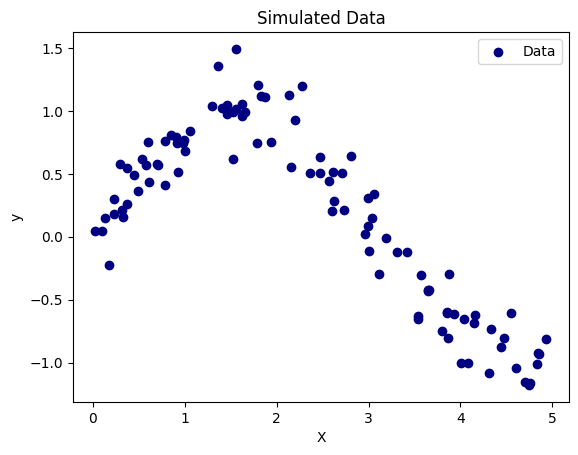

In [5]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0]) # y = sin(x) + noise

plt.scatter(X, y, color='navy', label='Data')
plt.title('Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

As we can see, the data resembles a regular sin(x), with a bit of noise added to it

Now we will test with 3 different degrees, where 1 = underfitting (high bias) and 15 = overfitting (high variance)

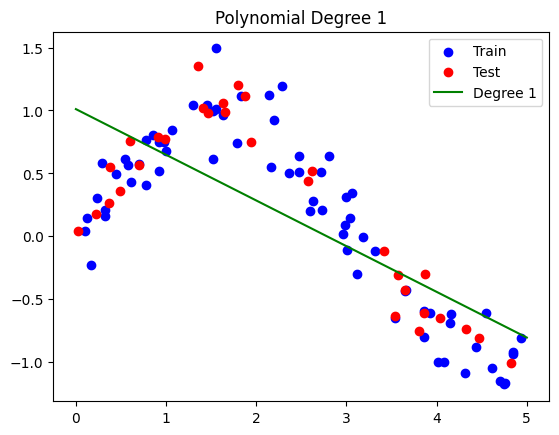

Degree 1
Train MSE: 0.2119
Test MSE: 0.2199
R2 (Train): 0.5770
R2 (Test): 0.5550
---


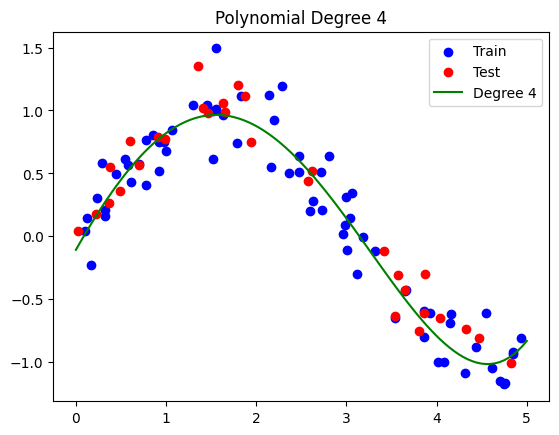

Degree 4
Train MSE: 0.0368
Test MSE: 0.0285
R2 (Train): 0.9264
R2 (Test): 0.9424
---


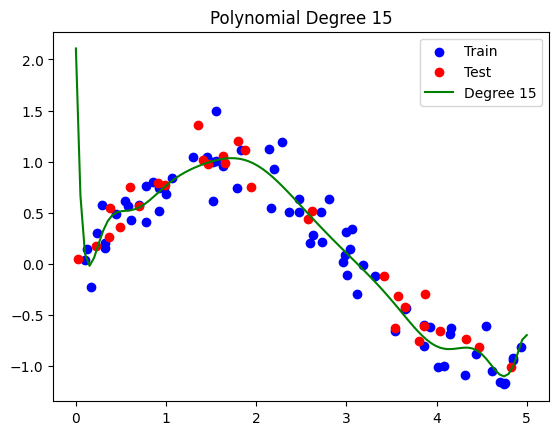

Degree 15
Train MSE: 0.0329
Test MSE: 0.0676
R2 (Train): 0.9344
R2 (Test): 0.8633
---


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = [1, 4, 15]

for degree in degrees:
    # Transform features
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Plot predictions
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='red', label='Test')
    plt.plot(X_plot, y_plot, color='green', label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()
    plt.show()

    # Print metrics
    print(f'Degree {degree}')
    print(f'Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}')
    print(f'R2 (Train): {r2_score(y_train, y_train_pred):.4f}')
    print(f'R2 (Test): {r2_score(y_test, y_test_pred):.4f}')
    print('---')

A linear model (degree=1) will miss the sinusoidal pattern → high bias

A moderate polynomial (degree=4) approximates the curvature well → good generalization

A very high-degree model (degree=15) tries to follow the noise → overfitting
